In [ ]:
import numpy as np
np.random.seed(43)
import matplotlib.pyplot as plt
mean1=[0,0,0]
cov1 = [[1, 0.8, 0.8], [0.8, 1, 0.8],[0.8, 0.8, 1]] 
X= np.random.multivariate_normal(mean1, cov1, 1000)
print(X)


[[-0.37783608  0.11676566 -0.45780845]
 [ 0.3471694   0.30203767  0.8447309 ]
 [-0.0026565  -1.33003507 -0.05867343]
 ...
 [ 0.59601504  0.73963566  0.50036625]
 [-0.00954922  0.69076099 -0.27270638]
 [-1.55886924 -1.23020385 -1.11034104]]


In [ ]:
X_min=np.min(X)
X_max=np.max(X)
X = (X - X_min)/(X_max - X_min)
X

array([[0.46034139, 0.53913369, 0.44760142],
       [0.57583806, 0.56864837, 0.65510187],
       [0.5201092 , 0.30865175, 0.51118545],
       ...,
       [0.6154803 , 0.63835972, 0.60024302],
       [0.51901116, 0.63057376, 0.47708902],
       [0.27219743, 0.32455532, 0.34365001]])

In [ ]:
print(X.shape)
X=X.T

(1000, 3)


In [ ]:
X_train=X[:,:800]
X_test=X[:,800:]
print(X_train.shape,X_test.shape)


(3, 800) (3, 200)


In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
trs=np.array([1,2,3])
print(trs*trs)

[1 4 9]


In [ ]:
X


array([[0.46034139, 0.57583806, 0.5201092 , ..., 0.6154803 , 0.51901116,
        0.27219743],
       [0.53913369, 0.56864837, 0.30865175, ..., 0.63835972, 0.63057376,
        0.32455532],
       [0.44760142, 0.65510187, 0.51118545, ..., 0.60024302, 0.47708902,
        0.34365001]])

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    B1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    B2 = np.zeros(shape=(n_y, 1))
    parameters = {"W1": W1,"B1": B1, "W2": W2,"B2": B2}
    
    return parameters 

In [ ]:
def forwardprop(parameters,Xi):
  W1=parameters["W1"]
  W2=parameters["W2"]
  B1=parameters["B1"]
  B2=parameters["B2"]
  A1 = np.matmul(W1, Xi) + B1
  Z1= sigmoid(A1)
  A2 = np.matmul(W2, Z1) + B2
  Z2=sigmoid(A2)
  cache={"Z2":Z2,"A2":A2,"Z1":Z1,"A1":A1}
  return cache
  


In [ ]:
def backwardprop(cache,parameters,Xi):
  Z2=cache["Z2"]
  A2=cache["A2"]
  Z1=cache["Z1"]
  A1=cache["A1"]
  W1=parameters["W1"]
  W2=parameters["W2"]
  B1=parameters["B1"]
  B2=parameters["B2"]
  E=(Xi-Z2)**2;
  dZ2= -2*(Xi-Z2)
  dA2=dZ2*(Z2*(1-Z2))
  dW2=np.dot(dA2,Z1.T)
  dB2=dA2
  dZ1=np.dot(W2.T,dA2)
  dA1=dZ1*(Z1*(1-Z1))
  dW1=np.dot(dA1,Xi.T)
  dB1=dA1

  grads={'dZ2':dZ2,'dA2':dA2,'dZ1':dZ1,'dW2':dW2,'dW1':dW1,'dA1':dA1,'dB2':dB2,'dB1':dB1}
  return grads

In [ ]:
def updateweights(parameters,grads,learningrate):
  W1=parameters["W1"]
  W2=parameters["W2"]
  B1=parameters["B1"]
  B2=parameters["B2"]
  W2-=learningrate*grads['dW2']
  W1-=learningrate*grads['dW1']
  B2-=learningrate*grads['dB2']
  B1-=learningrate*grads['dB1']
  parameters = {"W1": W1,"B1": B1, "W2": W2,"B2": B2}
  return parameters

In [ ]:
def runepoch(X_given,parameters):
  assert (X_given.shape==(3,800))
  for i in range(800):
    cur_cache=forwardprop(parameters,X_given[:,i:i+1])
    cur_grad=backwardprop(cur_cache,parameters,X_given[:,i:i+1])
    parameters=updateweights(parameters,cur_grad,.03)
  return parameters

In [ ]:
parameters=initialize_parameters(3, 2, 3)
testepocherror=[];
trainepocherror=[]
index=np.arange(1,101,1)
for i in range(100):
  p = np.random.permutation(800)
  parameters=runepoch(X_train[:,p],parameters)
  totalerror=0
  totaler2=0
  for i in range(200):
    curans=forwardprop(parameters,X_test[:,i:i+1])
    yhat=curans['Z2']
    Ei=(X_test[:,i:i+1]-yhat)**2;
    totalerror+=Ei 
  MSE=totalerror/200
  testepocherror.append(np.sum(MSE))
  for i in range(800):
    curans=forwardprop(parameters,X_train[:,i:i+1])
    yhat=curans['Z2']
    Ei=(X_train[:,i:i+1]-yhat)**2;
    totaler2+=Ei 
  MSE=totaler2/800
  trainepocherror.append(np.sum(MSE))

  # print(totalerror)




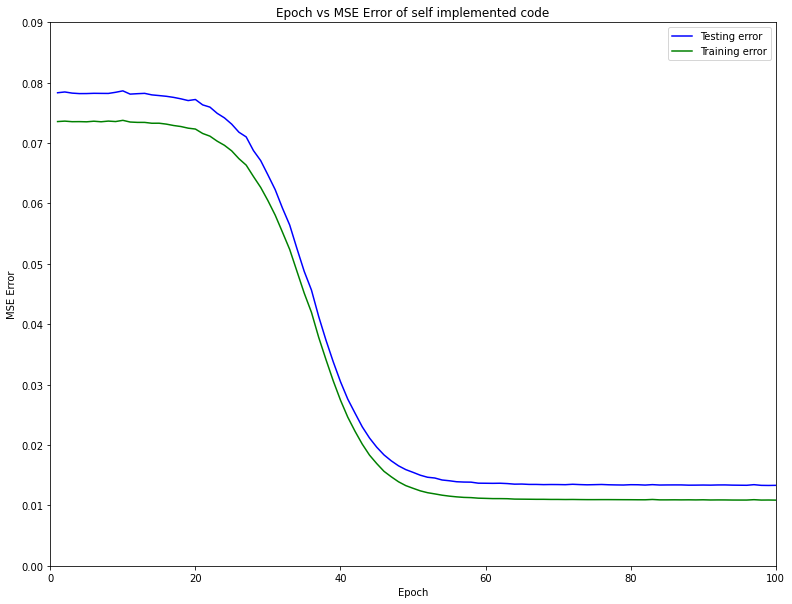

In [ ]:
plt.figure(figsize=(13,10))
plt.plot(index, testepocherror, 'b',label="Testing error")
plt.plot(index, trainepocherror,'g',label="Training error")
plt.xlabel("Epoch")
plt.ylabel("MSE Error")
plt.title("Epoch vs MSE Error of self implemented code")
plt.legend()
plt.axis([0, 100, 0, 0.09])
plt.show()

In [ ]:
trainepocherror[-1],testepocherror[-1]

(0.010873232615716955, 0.013320378386287095)

In [ ]:

curans=forwardprop(parameters,X_test[:,60:61])
print(X_test[:,60:61])
print(curans["Z1"],"FINAL")
print(curans["Z2"])

[[0.37913268]
 [0.5108019 ]
 [0.4170026 ]]
[[0.36792782]
 [0.41716501]] FINAL
[[0.42316229]
 [0.4223193 ]
 [0.42489503]]


**IMPLEMENTATION THROUGH PYTORCH AUTOGRAD**

In [ ]:
import torch

In [ ]:
X_torch=torch.from_numpy(X)

We get the normalised data directly from the previous numpy array

In [ ]:
X_torch

tensor([[0.4603, 0.5758, 0.5201,  ..., 0.6155, 0.5190, 0.2722],
        [0.5391, 0.5686, 0.3087,  ..., 0.6384, 0.6306, 0.3246],
        [0.4476, 0.6551, 0.5112,  ..., 0.6002, 0.4771, 0.3437]],
       dtype=torch.float64)

In [ ]:
X_train=torch.tensor(X_train)
X_test=torch.tensor(X_test)
X_train.dtype

torch.float64

In [ ]:
def initialize_parameterstorch(n_x, n_h, n_y):
    W1 = torch.randn(n_h, n_x,requires_grad=True,dtype=torch.float64) * 0.01
    B1 = torch.zeros(n_h, 1, requires_grad=True,dtype=torch.float64)
    W2 = torch.randn(n_y, n_h,requires_grad=True,dtype=torch.float64) * 0.01
    B2 = torch.zeros(n_y, 1, requires_grad=True,dtype=torch.float64)
    parameters = {"W1": W1,"B1": B1, "W2": W2,"B2": B2}
    
    return parameters 

In [ ]:
def forwardproptorch(parameters, Xi):
  W1=parameters["W1"]
  W2=parameters["W2"]
  B1=parameters["B1"]
  B2=parameters["B2"]
  # print(W1.shape,W1.dtype)
  A1 = torch.matmul (W1,Xi) + B1
  Z1= torch.sigmoid(A1)
  A2 = torch.matmul (W2,Z1)+B2
  Z2=torch.sigmoid(A2)
  E=(Xi-Z2)**2;
  # print(E)   
  E.retain_grad()
  Z2.retain_grad()
  A2.retain_grad()
  Z1.retain_grad()
  A1.retain_grad()
  W2.retain_grad()
  W1.retain_grad()
  B2.retain_grad()
  B1.retain_grad()
  
  E.sum().backward(retain_graph=True)
  # print("E.grad ",E.grad,"Z2.grad ",Z2.grad,"A2.grad ",A2.grad,"W2.grad ",W2.grad)
  grads={'dZ2':Z2.grad,'dA2':A2.grad,'dZ1':Z1.grad,'dW2':W2.grad,'dW1':W1.grad,'dA1':A1.grad,'dB2':B2.grad,'dB1':B1.grad}
  cache={"Z2":Z2,"A2":A2,"Z1":Z1,"A1":A1}
  return cache,grads

In [ ]:
def updateweightstorch(parameters,grads,learningrate):
  W1=parameters["W1"]
  W2=parameters["W2"]
  B1=parameters["B1"]
  B2=parameters["B2"]
  with torch.no_grad():
        # print("GRADIENT ",W2,W2.grad)
        W2-=learningrate*W2.grad
        W1-=learningrate*W1.grad
        B2-=learningrate*B2.grad
        B1-=learningrate*B1.grad
  W2.grad.zero_()
  W1.grad.zero_()
  B1.grad.zero_()
  B2.grad.zero_()
  parameters = {"W1": W1,"B1": B1, "W2": W2,"B2": B2}
  return parameters

In [ ]:
def runepochtorch(X_given,parameters):
  assert (X_given.shape==(3,800))
  for i in range(800):
    cur_cache,cur_grad=forwardproptorch(parameters,X_given[:,i:i+1])
    parameters=updateweightstorch(parameters,cur_grad,.03)
  return parameters

In [ ]:
parameters=initialize_parameterstorch(3, 2, 3)
testepocherror=[];
trainepocherror=[]
index=np.arange(1,101,1)
for i in range(100):
  p = np.random.permutation(800)
  parameters=runepochtorch(X_train[:,p],parameters)
  totalerror=0
  totaler2=0
  for i in range(200):
    curans,grad=forwardproptorch(parameters,X_test[:,i:i+1])
    yhat=curans['Z2']
    Ei=(X_test[:,i:i+1]-yhat)**2;
    totalerror+=Ei 
  MSE=totalerror/200
  testepocherror.append(torch.sum(MSE))
  for i in range(800):
    curans,grad=forwardproptorch(parameters,X_train[:,i:i+1])
    yhat=curans['Z2']
    Ei=(X_train[:,i:i+1]-yhat)**2;
    totaler2+=Ei 
  MSE=totaler2/800
  trainepocherror.append(torch.sum(MSE))
  # print(totalerror)



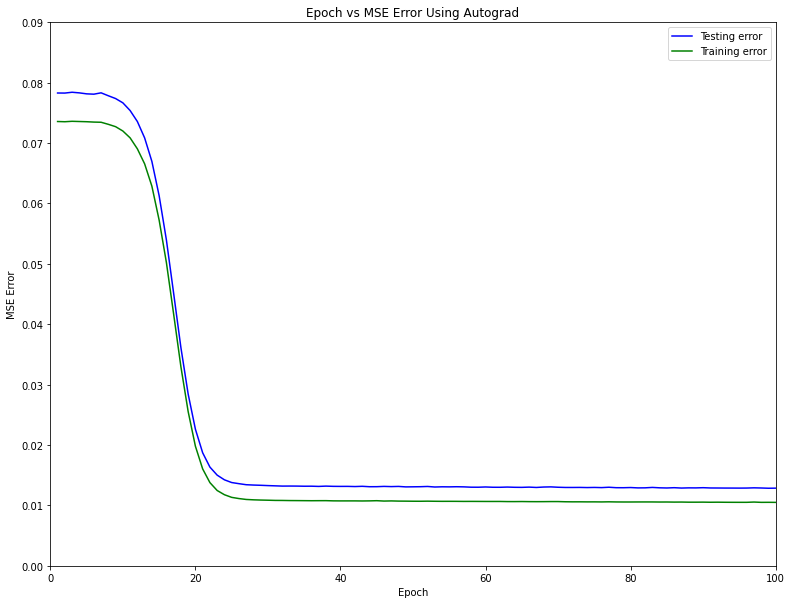

In [ ]:
plt.figure(figsize=(13,10))
plt.plot(index, testepocherror, 'b',label="Testing error")
plt.plot(index, trainepocherror,'g',label="Training error")
plt.xlabel("Epoch")
plt.ylabel("MSE Error")
plt.title("Epoch vs MSE Error Using Autograd")
plt.legend()
plt.axis([0, 100, 0, 0.09])
plt.show()

In [ ]:
trainepocherror[-1],testepocherror[-1]

(tensor(0.0105, dtype=torch.float64, grad_fn=<SumBackward0>),
 tensor(0.0129, dtype=torch.float64, grad_fn=<SumBackward0>))